# Baby Naming Trend Analysis

Let's find out what factors might influence how babies are named.

## The Desire to be Different

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
from wordcloud import WordCloud
# For saving choropleth maps online in order to view them on NB viewer
import chart_studio.plotly as pyonline
import plotly.graph_objs as go
from plotly import tools

In [2]:
import os
os.chdir('/Users/caiyilun/Desktop/mini #4/namesbystate')

In [3]:
df_full = pd.DataFrame()
for files in glob.glob("*.TXT"):
    df_full = pd.concat([df_full, pd.read_csv(files, header=None)], axis=0)

In [4]:
var_name = ['state', 'gender', 'year', 'name', 'count']

In [5]:
df_full.columns = var_name

In [6]:
# Only focus on the data after the Social Security Administration was established
df = df_full[df_full['year'] > 1935]

In [7]:
# Incorporate the birth data
df_birth = pd.read_csv('/Users/caiyilun/Desktop/mini #4/Birth_data.csv')


In [8]:
df_unique_name = df.groupby('year')['name'].nunique()

In [9]:
df_yearly = pd.DataFrame(df.groupby('year')['count'].sum()).reset_index()
df_yearly.rename(columns={'year':'Year'}, inplace = True)


In [10]:
df_yearly = pd.merge(df_yearly, df_birth)


In [11]:
total = go.Scatter(x=df_yearly['Year'], y=round(df_yearly['Birth Number'], -3), showlegend=False,
                   line=dict(width=3), fill='tonexty', name='')
name = go.Scatter(x=df_unique_name.index, y=df_unique_name.values, showlegend=False,
                  line=dict(width=3), fill='tonexty', name='')
line_naming_uniqueness = tools.make_subplots(rows=2, cols=1, subplot_titles=('No. of Babies Born Over Time',
                                                          'No. of Distinct Popular Names Used Over Time'),
                          print_grid=False, shared_xaxes=True)
line_naming_uniqueness.append_trace(total, 1, 1)
line_naming_uniqueness.append_trace(name, 2, 1)
line_naming_uniqueness['layout']['xaxis1'].update(title='Year', titlefont=dict(size=16),
                               tickfont=dict(size=14))
line_naming_uniqueness['layout']['yaxis1'].update(title='No. of Babies', titlefont=dict(size=16),
                               tickfont=dict(size=14))
line_naming_uniqueness['layout']['yaxis2'].update(title='No. of Names', titlefont=dict(size=16),
                               tickfont=dict(size=14))
for i in line_naming_uniqueness['layout']['annotations']:
    i['font']['size'] = 20
#py.iplot(line_naming_uniqueness);
line_naming_uniqueness.write_html('line_graph_baby_name_uniqueness_over_time.html',auto_open=True)

/Applications/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [12]:
df_yearly['unpop_count'] = df_yearly['Birth Number'] - df_yearly['count']

In [13]:
popular = go.Scatter(x=df_yearly['Year'], y=round(df_yearly['count'], -3),
                     name='Babies Born with Popular Name',
                     line=dict(color='rgb(153, 0, 153)', width=3), fill='none')
total = go.Scatter(x=df_yearly['Year'], y=round(df_yearly['Birth Number'], -3),
                   name='Total Babies Born', 
                   line=dict(color='rgb(0, 153, 153)', width=3), fill='tonexty')
data = [popular, total]
layout = dict(title='Total No. of Babies Born & No. of Babies with Popular Name', font=dict(size=16),
              xaxis=dict(title='Year', titlefont=dict(size=18),
                         tickfont=dict(size=14)),
              yaxis=dict(title='No. of Babies Born',
                         titlefont=dict(size=18), tickfont=dict(size=14)),
              legend=dict(font=dict(size=12)))
fig = dict(data=data, layout=layout)
line_popularname_trend = py.iplot(fig)

<a id='celebrity_influence'></a>

## Celebrities' Influence

In [15]:
def create_graph_time(df, name, gender, event, event_year, event2, event_year2, event_position2):
    df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
    df_name = pd.DataFrame(df[df['name'] == name].groupby('year')['count'].sum()).reset_index()
    df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
    color_tone = 'rgb(255, 153, 204)' if gender == 'female' else 'rgb(102, 178, 255)'
    graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                       line=dict(color=color_tone, width=3), fill='tonexty', name='')
    line = go.Scatter(x=[event_year]*df_name_pad['count'].max().astype(int),
                      y=[i for i in range(df_name_pad['count'].max().astype(int))],
                      line=dict(color=color_tone, width=3, dash='dot'),
                      hoverinfo='none')
    data = [graph, line]
    layout = dict(title='Baby Naming Trend for '+name, titlefont=dict(size=22),
                  xaxis=dict(rangeslider=dict(visible=True),
                             title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
                  yaxis=dict(title='No. of babies named',
                             titlefont=dict(size=16), tickfont=dict(size=13)),
                  annotations=[dict(x=event_year, y=df_name_pad['count'].max().astype(int),
                                    xref='x', yref='y', text=event, ax=0, ay=-40,
                                    font=dict(size=16)),
                               dict(x=event_year2, y=int(event_position2),
                                    xref='x', yref='y', text=event2, ax=0, ay=25,
                                    font=dict(size=16))],
                  showlegend=False)
    fig = dict(data=data, layout=layout)
    return fig

### Beyonce

In [18]:
df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
df_name = pd.DataFrame(df[df['name'] == 'Beyonce'].groupby('year')['count'].sum()).reset_index()
df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                   line=dict(color='rgb(255, 153, 204)', width=3), fill='tonexty', name='')
line = go.Scatter(x=[1997] * df_name_pad['count'].max().astype(int),
                  y=[i for i in range(df_name_pad['count'].max().astype(int))],
                  line=dict(color='rgb(255, 153, 204)', width=3, dash='dot'), hoverinfo='none')
data = [graph, line]
layout = dict(title='Baby Naming Trend for Beyonce', titlefont=dict(size=22),
              xaxis=dict(rangeslider=dict(visible=True),
                         title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
              yaxis=dict(title='No. of babies named',
                         titlefont=dict(size=16), tickfont=dict(size=13)),
              annotations=[dict(x=1997, y=df_name_pad['count'].max().astype(int),
                                xref='x', yref='y', text='Beyonce\'s 1st single as Destiny\'s Child',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2002, y=int(100),
                                xref='x', yref='y', text='Beyonce\'s 1st solo single',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2006, y=int(56),
                                xref='x', yref='y', text='Beyonce\'s "Irreplaceable" released',
                                ax=0, ay=20, font=dict(size=16))], showlegend=False)
fig_beyonce = dict(data=data, layout=layout)
py.iplot(fig_beyonce)

### Kobe

In [20]:
df_year_pad = pd.DataFrame(np.unique(df['year'])).rename(columns={0: 'year'})
df_name = pd.DataFrame(df[df['name'] == 'Kobe'].groupby('year')['count'].sum()).reset_index()
df_name_pad = pd.merge(df_year_pad, df_name, how='outer').fillna(0)
graph = go.Scatter(x=df_name_pad['year'], y=df_name_pad['count'],
                   line=dict(color='rgb(102, 178, 255)', width=3), fill='tonexty', name='')
line = go.Scatter(x=[1996]*df_name_pad['count'].max().astype(int),
                  y=[i for i in range(df_name_pad['count'].max().astype(int))],
                  line=dict(color='rgb(102, 178, 255)', width=3, dash='dot'), hoverinfo='none')
data = [graph, line]
layout = dict(title='Baby Naming Trend for Kobe', titlefont=dict(size=22),
              xaxis=dict(rangeslider=dict(visible=True),
                         title='Year', titlefont=dict(size=16), tickfont=dict(size=13)),
              yaxis=dict(title='No. of babies named',
                         titlefont=dict(size=16), tickfont=dict(size=13)),
              annotations=[dict(x=1996, y=df_name_pad['count'].max().astype(int),
                                xref='x', yref='y', text='Kobe Bryant\'s 1st NBA game',
                                ax=0, ay=-40, font=dict(size=16)),
                           dict(x=2001, y=int(1500),
                                xref='x', yref='y', text='Lakers won NBA (2000-02)',
                                ax=10, ay=10, font=dict(size=16), xanchor="left"),
                           dict(x=2003, y=int(1200),
                                xref='x', yref='y', text='Kobe Bryant accused of sexual assault',
                                ax=0, ay=20, font=dict(size=16))], showlegend=False)
fig_kobe = dict(data=data, layout=layout)
py.iplot(fig_kobe)

### Barack

In [52]:
fig_barack = create_graph_time(df, 'Barack', 'male', 'President Obama got elected', 2008, '', '', '0')
py.iplot(fig_barack)

<a id='conclusion'></a>

## Recent Trend

I am also interested in finding out the most popular baby names in the past decade and look at their trends, as well as regional differences in usage.

In [53]:
df_female = pd.DataFrame(df[df['gender'] == 'F'].
                         groupby(['year', 'name'])['count'].sum()).reset_index()
df_female_post2007 = pd.DataFrame(df_female[df_female['year'] >= 2007].
                                  groupby('name')['count'].sum()).reset_index()

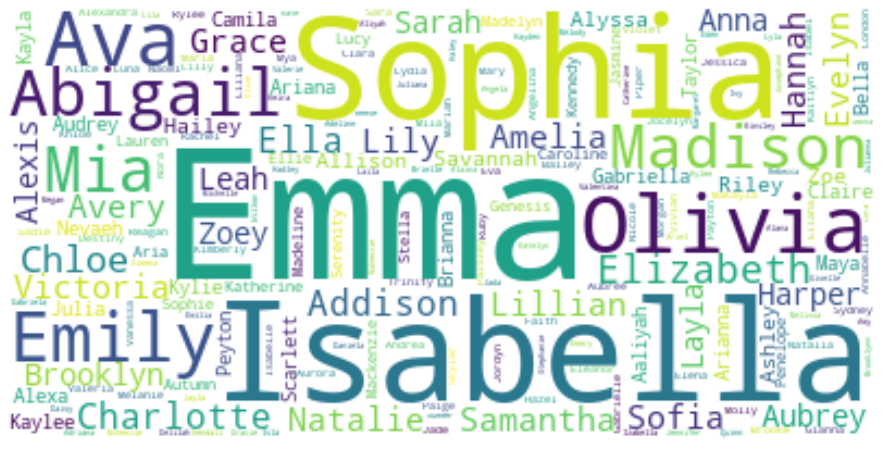

In [54]:
d = {}
for a, x in df_female_post2007.values:
    d[a] = x
wordcloud = WordCloud(background_color='white', min_font_size=int(4))
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

### Emma

In [21]:
fig_emma = create_graph_time(df, 'Emma', 'female', '', '', '', '', 0)
py.iplot(fig_emma)

In [58]:
df_male = pd.DataFrame(df[df['gender'] == 'M'].
                       groupby(['year', 'name'])['count'].sum()).reset_index()
df_male_post2010 = pd.DataFrame(df_male[df_male['year'] > 2010].
                                groupby('name')['count'].sum()).reset_index()

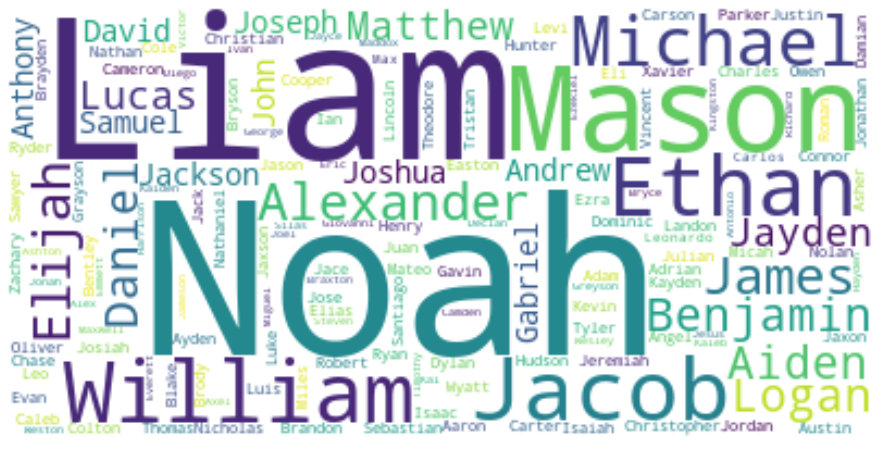

In [59]:
d = {}
for a, x in df_male_post2010.values:
    d[a] = x
wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

In [62]:
fig_noah = create_graph_time(df, 'Noah', 'male', '', '', '', '', 0)
py.iplot(fig_noah)

<a id='appendix'></a>

(1) https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-data-by-state-and-district-of- 

(2) https://catalog.data.gov/dataset/births-and-general-fertility-rates-united-states-1909-2013/resource/a4d978b0-3396-4bb9-b967-b3c8c69b03a3?inner_span=True

(3) https://www.biography.com/people/rihanna-201257

(4) https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_Rihanna

(5) https://worldhistoryproject.org/topics/beyonce-knowles/page/1

(6) https://www.cnn.com/2013/04/29/us/kobe-bryant-fast-facts/index.html

